In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
housing_data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
876,-122.01,37.56,6.0,3028.0,778.0,1531.0,736.0,4.4259,158000.0,NEAR BAY
19573,-120.95,37.62,11.0,4981.0,814.0,1934.0,686.0,3.7041,174800.0,INLAND
16791,-122.45,37.67,36.0,1664.0,326.0,963.0,322.0,4.7813,246400.0,NEAR OCEAN
11649,-118.04,33.85,24.0,2233.0,347.0,1162.0,355.0,5.6094,279200.0,<1H OCEAN
14908,-117.05,32.62,34.0,3928.0,686.0,2315.0,681.0,4.2851,144500.0,NEAR OCEAN


In [4]:
housing_data = housing_data.dropna()

In [5]:
housing_data.shape

(20433, 10)

In [6]:
housing_data.loc[housing_data['median_house_value']==500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [7]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [8]:
housing_data.shape

(19475, 10)

In [9]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing_data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing_data = pd.get_dummies(housing_data,columns=['ocean_proximity'])

In [12]:
housing_data.shape

(19475, 14)

In [13]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14620,-117.16,32.79,32.0,1731.0,413.0,1569.0,427.0,3.3375,154300.0,0,0,0,0,1
6136,-117.99,34.08,35.0,1032.0,207.0,954.0,191.0,2.8906,134800.0,0,1,0,0,0
20485,-118.67,34.28,21.0,4059.0,598.0,2133.0,634.0,5.6949,235300.0,1,0,0,0,0
8080,-118.19,33.82,11.0,872.0,203.0,422.0,221.0,4.6364,156300.0,0,0,0,0,1
3926,-118.54,34.19,22.0,3380.0,790.0,2199.0,737.0,2.5739,239200.0,1,0,0,0,0


In [14]:
X = housing_data.drop(['median_house_value'],axis=1)
Y = housing_data.median_house_value

In [15]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [17]:
x_train.shape,x_test.shape

((15580, 13), (3895, 13))

In [18]:
y_train.shape,y_test.shape


((15580,), (3895,))

In [19]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize = True).fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [20]:
print("Training Score : ",linear_model.score(x_train,y_train))

Training Score :  0.6114626315037446


In [21]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND        -25512.723795
longitude                     -24302.417430
latitude                      -22277.837593
population                       -29.376839
total_rooms                       -7.720142
households                        40.496758
total_bedrooms                    94.188268
housing_median_age               941.479176
ocean_proximity_NEAR BAY        6028.327164
ocean_proximity_<1H OCEAN      12846.494957
ocean_proximity_NEAR OCEAN     17316.261267
median_income                  38935.318531
ocean_proximity_ISLAND        240039.772053
dtype: float64


In [23]:
y_pred = linear_model.predict(x_test)

In [24]:
df_pred_actual = pd.DataFrame({'predicted' : y_pred , 'actual': y_test})

In [25]:
df_pred_actual.head()

,predicted,actual
13901,122815.826330,69600.0
12500,148597.118219,213200.0
19411,217898.792458,248600.0
7736,163707.719978,195800.0
19509,100154.041147,88300.0


In [26]:
from sklearn.metrics import r2_score
print("Testing score : ",r2_score(y_test,y_pred))

Testing score :  0.6184439427864996


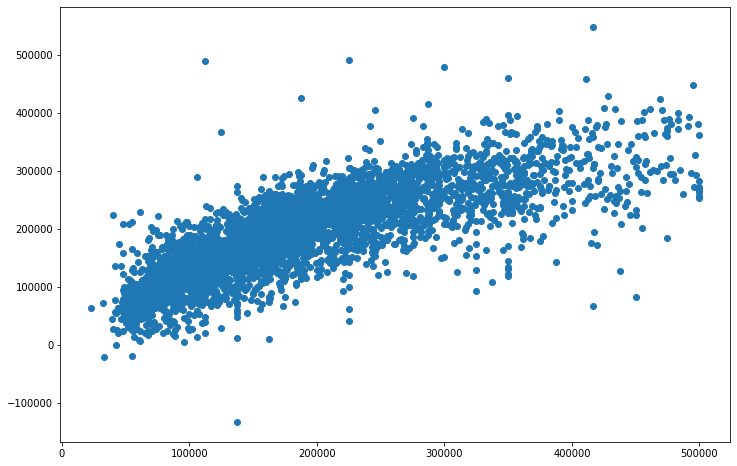

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.show()

In [28]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [29]:
df_pred_actual_sample.head()

,index,predicted,actual
0,6132,121279.651126,152500.0
1,16423,83168.916597,162500.0
2,12582,120457.474084,72100.0
3,13191,189322.908625,142500.0
4,764,218986.544667,149700.0


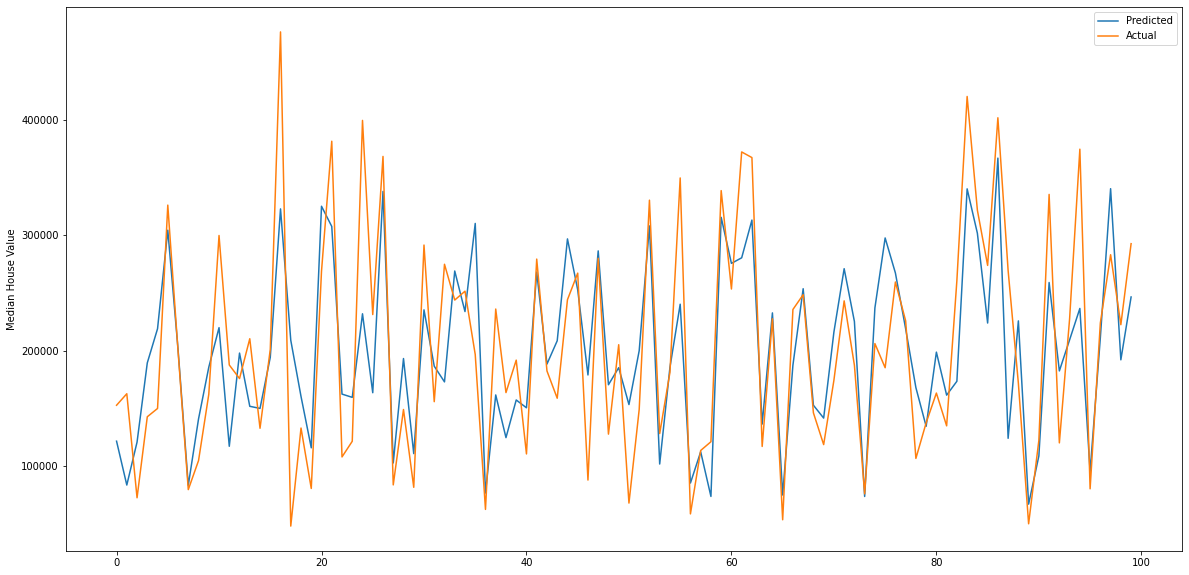

In [30]:
plt.figure(figsize=(20,10))

plt.plot(df_pred_actual_sample.predicted,label = 'Predicted')
plt.plot(df_pred_actual_sample.actual,label = 'Actual')

plt.ylabel('Median House Value')

plt.legend()
plt.show()